In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, LocalOutlierFactor as LOF

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
nfl_df = pd.read_csv('nfl_pts_and_vegas_2014-2023.csv')
print(nfl_df)

      Season  Week Tm_name    Date  Win  OT  Home Opp_Name  Tm_Pts  Opp_Pts  \
0       2014     1     CRD   8-Sep    1   0     1      SDG      18       17   
1       2014     2     CRD  14-Sep    1   0     0      NYG      25       14   
2       2014     3     CRD  21-Sep    1   0     1      SFO      23       14   
3       2014     5     CRD   5-Oct    0   0     0      DEN      20       41   
4       2014     6     CRD  12-Oct    1   0     1      WAS      30       20   
...      ...   ...     ...     ...  ...  ..   ...      ...     ...      ...   
5176    2023    13     WAS   3-Dec    0   0     1      MIA      15       45   
5177    2023    15     WAS  17-Dec    0   0     0      RAM      20       28   
5178    2023    16     WAS  24-Dec    0   0     0      NYJ      28       30   
5179    2023    17     WAS  31-Dec    0   0     1      SFO      10       27   
5180    2023    18     WAS   7-Jan    0   0     1      DAL      10       38   

      Spread  Total  Actual_Total  Div_Game  
0    

In [9]:
nfl_df['True_Total'] = nfl_df['Tm_Pts'] + nfl_df['Opp_Pts']
nfl_df['Over'] = np.where(nfl_df['True_Total'] > nfl_df['Total'], 1,0)
nfl_df['Under'] = np.where(nfl_df['True_Total'] < nfl_df['Total'], 1,0)
nfl_df['Push'] = np.where(nfl_df['True_Total'] == nfl_df['Total'], 1,0)
print(nfl_df)

      Season  Week Tm_name    Date  Win  OT  Home Opp_Name  Tm_Pts  Opp_Pts  \
0       2014     1     CRD   8-Sep    1   0     1      SDG      18       17   
1       2014     2     CRD  14-Sep    1   0     0      NYG      25       14   
2       2014     3     CRD  21-Sep    1   0     1      SFO      23       14   
3       2014     5     CRD   5-Oct    0   0     0      DEN      20       41   
4       2014     6     CRD  12-Oct    1   0     1      WAS      30       20   
...      ...   ...     ...     ...  ...  ..   ...      ...     ...      ...   
5176    2023    13     WAS   3-Dec    0   0     1      MIA      15       45   
5177    2023    15     WAS  17-Dec    0   0     0      RAM      20       28   
5178    2023    16     WAS  24-Dec    0   0     0      NYJ      28       30   
5179    2023    17     WAS  31-Dec    0   0     1      SFO      10       27   
5180    2023    18     WAS   7-Jan    0   0     1      DAL      10       38   

      Spread  Total  Actual_Total  Div_Game  True_T

In [10]:
nfl_df = nfl_df.sort_values(by=['Season','Week']).reset_index(drop=True)


Results for 2021:
 Week  1: accuracy score56.25%
 Week  2: accuracy score31.25%
 Week  3: accuracy score46.67%
 Week  4: accuracy score40.00%
 Week  5: accuracy score56.25%
 Week  6: accuracy score61.54%
 Week  7: accuracy score63.64%
 Week  8: accuracy score64.29%
 Week  9: 

C:\Users\agarn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\agarn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

accuracy score69.23%
 Week 10: accuracy score61.54%
 Week 11: accuracy score57.14%
 Week 12: accuracy score40.00%
 Week 13: accuracy score23.08%
 Week 14: accuracy score53.85%
 Week 15: accuracy score26.67%
 Week 16: accuracy score80.00%
 Week 17: accuracy score53.33%
 Week 18: accuracy score64.29%
Season 2021: Total accuracy score=52.34%

Classification Report for 2021:
              precision    recall  f1-score   support

        Over       0.49      0.48      0.48       119
       Under       0.55      0.56      0.56       137

    accuracy                           0.52       256
   macro avg       0.52      0.52      0.52       256
weighted avg       0.52      0.52      0.52       256



C:\Users\agarn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\agarn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

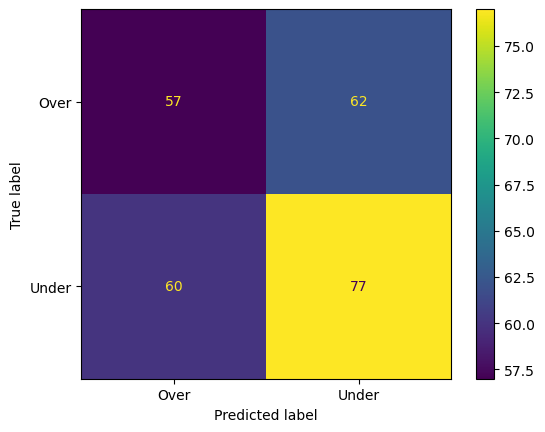


Results for 2022:
 Week  1: accuracy score68.75%
 Week  2: accuracy score37.50%
 Week  3: accuracy score73.33%
 Week  4: accuracy score62.50%
 Week  5: accuracy score43.75%
 Week  6: accuracy score64.29%
 Week  7: accuracy score53.85%
 Week  8: accuracy score42.86%
 Week  9: accuracy score53.85%
 Week 10: 

C:\Users\agarn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\agarn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

accuracy score35.71%
 Week 11: accuracy score42.86%
 Week 12: accuracy score50.00%
 Week 13: accuracy score46.67%
 Week 14: accuracy score53.85%
 Week 15: accuracy score37.50%
 Week 16: accuracy score42.86%
 Week 17: accuracy score84.62%
 Week 18: accuracy score43.75%
Season 2022: Total accuracy score=51.89%

Classification Report for 2022:
              precision    recall  f1-score   support

        Over       0.46      0.46      0.46       118
       Under       0.56      0.57      0.57       146

    accuracy                           0.52       264
   macro avg       0.51      0.51      0.51       264
weighted avg       0.52      0.52      0.52       264



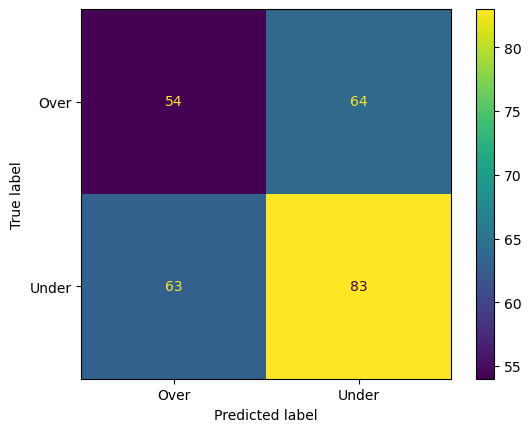


Results for 2023:
 Week  1: accuracy score80.00%
 Week  2: accuracy score50.00%
 Week  3: accuracy score68.75%
 Week  4: accuracy score68.75%
 Week  5: accuracy score57.14%
 Week  6: accuracy score50.00%
 Week  7: accuracy score61.54%
 Week  8: 

C:\Users\agarn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\agarn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

accuracy score46.67%
 Week  9: accuracy score64.29%
 Week 10: accuracy score50.00%
 Week 11: accuracy score60.00%
 Week 12: accuracy score75.00%
 Week 13: accuracy score53.85%
 Week 14: accuracy score33.33%
 Week 15: accuracy score46.15%
 Week 16: accuracy score50.00%
 Week 17: accuracy score35.71%
 Week 18: accuracy score57.14%
Season 2023: Total accuracy score=56.52%

Classification Report for 2023:
              precision    recall  f1-score   support

        Over       0.52      0.53      0.52       114
       Under       0.61      0.60      0.60       139

    accuracy                           0.57       253
   macro avg       0.56      0.56      0.56       253
weighted avg       0.57      0.57      0.57       253



C:\Users\agarn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\agarn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

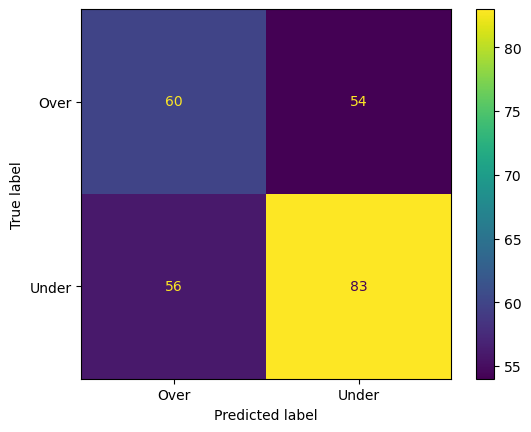

In [11]:
df = nfl_df.query('Home == 1').reset_index(drop=True)

features = ['Spread','Total']
target = 'Under'

for season in [2021, 2022, 2023]:
    
    print(f'\nResults for {season}:')
    
    y_preds = []
    y_trues = []
    
    for week in range(1,19):
        print(f' Week {week:>2}:', end=' ') 
        train_df = df.query('Season < @season or (Season == @season and Week < @week)')
        test_df = df.query('Season == @season and Week == @week and True_Total != Total')
        
        X_train = train_df[features]
        y_train = train_df[target]
        X_test = test_df[features]
        y_test = test_df[target]
        
        model = KNeighborsClassifier(n_neighbors=7)
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', KNeighborsClassifier(n_neighbors=7))
        ])
        
        clf = pipe.fit(X_train, y_train)
        
        pipe2 = Pipeline([
            ('scaler', StandardScaler()),
            ('lof', LOF(novelty=True))
        ])
        pipe2.fit(X_train)
        y_test_novelty = pipe2.predict(X_test)
        mask = [ y == 1 for y in y_test_novelty]
        X_test = X_test[mask]
        y_test = y_test[mask]
        
        y_pred = clf.predict(X_test)
        
        if week == 1:
            y_test = test_df[target]
            y_pred = [1] * len(y_test)
            
        y_true = y_test
        
        print(f'accuracy score{accuracy_score(y_true, y_pred):.2%}')
        
        y_preds += list(y_pred)
        y_trues += list(y_true)
        
    print(f'Season {season}: Total accuracy score={accuracy_score(y_trues, y_preds):.2%}')
    print(f'\nClassification Report for {season}:')
    print(classification_report(y_trues, y_preds, target_names=['Over', 'Under']))
    
    cm = confusion_matrix(y_trues, y_preds)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Over', 'Under'])
    display.plot()
    plt.grid(False)
    plt.show()    
        

In [13]:
# Make predictions for NFL Totals (Season = 2024, Week = 1)
# Set the dataframe
df = nfl_df.query('Home == 1')

# Set the features and the target variable
features = ['Spread','Total']
target = 'Under'

# Set the season and the week
season = 2024
week = 4

# Create training set
train_df = df.query('Season < @season or (Season == @season and Week < @week)')

# Create X_train and y_train
X_train = train_df[features]
y_train = train_df[target]

# Two-dimensional list with upcoming game data from the home team's perspective
week1 = [
    ['Cowboys @ Giants', +5.5, 45.5],
    ['Bengals @ Panthers', +4.5, 48.5],
    ['Saints @ Falcons', -1.5, 42.5],
    ['Jaguars @ Texans', -7.0, 45.5],
    ['Broncos @ Jets', -7.5, 38.5],
    ['Vikings @ Packers', -2.5, 43.5],
    ['Steelers @ Colts', +1.5, 39.5],
    ['Rams @ Bears', -2.5, 40.5],
    ['Eagles @ Buccaneers', +2.5, 44.5],
    ['Patriots @ 49ers', -10.0, 39.5],
    ['Commanders @ Cardinals', -3.5, 50.5],
    ['Cheifs @ Chargers', +8.5, 39.5],
    ['Browns @ Raiders', +1.5, 37.5],
    ['Bills @ Ravens', -1.5, 46.5],
    ['Titans @ Dolphins', +1.5, 36.5],
    ['Seahawks @ Lions', -4.5, 47.5]
]

# Create X_new dataframe from the upcoming game data
X_new = pd.DataFrame(week1, columns=['Game','Spread','Total'])

# Create X_new dataframe for the upcoming game data
X_new = pd.DataFrame(week1, columns= ['Game', 'Spread', 'Total'])

# Create a pipeline with scaler and model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=7))
])

# train model
clf = pipe.fit(X_train, y_train)

# Detect and remove novelty data from the new data
lof = LOF(novelty=True)
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('lof', LOF(novelty=True))
])

pipe2.fit(X_train)
y_test_novelty = pipe2.predict(X_new[features])

# Create a mask for novelty data
mask = [y == 1 for y in y_test_novelty]

# Remove the novelty games from the new dataset
X_new = X_new[mask]

# Make the predictions
y_pred = clf.predict(X_new[features])

# Make all Week 1 games Under
if week == 1:
    y_pred = [1] * len(X_new)
    
# Add predictions to the dataframe
X_new['KNC(7)'] = y_pred
X_new['KNC(7)'] = X_new['KNC(7)'].apply(lambda x: 'Under' if x == 1 else 'Over')

# Display the dataframe with the predictions
print(f'MODEL PREDICTIONS FOR WEEK {week} OF THE {season} NFL SEASON\n')
print(X_new[['Game','Spread','Total','KNC(7)']])

MODEL PREDICTIONS FOR WEEK 4 OF THE 2024 NFL SEASON

                      Game  Spread  Total KNC(7)
0         Cowboys @ Giants     5.5   45.5   Over
1       Bengals @ Panthers     4.5   48.5   Over
2         Saints @ Falcons    -1.5   42.5  Under
3         Jaguars @ Texans    -7.0   45.5  Under
4           Broncos @ Jets    -7.5   38.5   Over
5        Vikings @ Packers    -2.5   43.5   Over
6         Steelers @ Colts     1.5   39.5  Under
7             Rams @ Bears    -2.5   40.5   Over
8      Eagles @ Buccaneers     2.5   44.5   Over
9         Patriots @ 49ers   -10.0   39.5   Over
10  Commanders @ Cardinals    -3.5   50.5   Over
11       Cheifs @ Chargers     8.5   39.5   Over
12        Browns @ Raiders     1.5   37.5  Under
13          Bills @ Ravens    -1.5   46.5   Over
14       Titans @ Dolphins     1.5   36.5  Under
15        Seahawks @ Lions    -4.5   47.5  Under


C:\Users\agarn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
